In [102]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import json

In [103]:
def load_data(filename):
    with open(filename) as json_file:
        data = json.load(json_file)
        return np.array(data)

In [104]:
data = load_data("../data/встряска.json")

In [105]:
def data_taking(data):
    vectors_accelerometer_x = []
    vectors_accelerometer_y = []
    vectors_accelerometer_z = []
    ox = []

    counter = 0
    for gesture in data:
        counter += 1
        if counter != 1: continue
        # for time_series in gesture:
        for i in range(1, len(gesture)):
            vectors_accelerometer_x.append(gesture[i][1])
            vectors_accelerometer_y.append(gesture[i][2])
            vectors_accelerometer_z.append(gesture[i][3])
            ox.append(gesture[i][0])
    return ox, vectors_accelerometer_x, vectors_accelerometer_y, vectors_accelerometer_z

ox, vectors_accelerometer_x, vectors_accelerometer_y, vectors_accelerometer_z = data_taking(data)

In [106]:
def filter(order, cutoff_freq, sampling_freq, vectors_accelerometer_x, ox):
    sampling_duration = int(ox[len(ox) - 1])
    number_of_samples = len(vectors_accelerometer_x)
    normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
    numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq)
    filtered_signal = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, vectors_accelerometer_x)
    return filtered_signal

In [107]:
def show_p(name_of_pic, number_of_pic, color1, color2, name_ox, 
           order, cutoff_freq, sampling_freq, vectors_accelerometer_x, ox):
    filtered_signal = filter(order, cutoff_freq, sampling_freq, vectors_accelerometer_x, ox)
    plt.figure(figsize=(20, 16))
    plt.style.use('fivethirtyeight')
    plt.plot(ox, vectors_accelerometer_x, color1, label='сырые данные')
    plt.plot(ox, filtered_signal, color2, linewidth=3, label='отфильтрованные')
    plt.legend(loc=1, prop={'size': 24})
    plt.title('Данные с акселерометра по оси ' + name_ox + ' жест ' + name_of_pic + ' ' + number_of_pic)
    plt.ylabel('значения в м/с^2')
    plt.xlabel('время в миллисекундах')
    plt.show()
    return

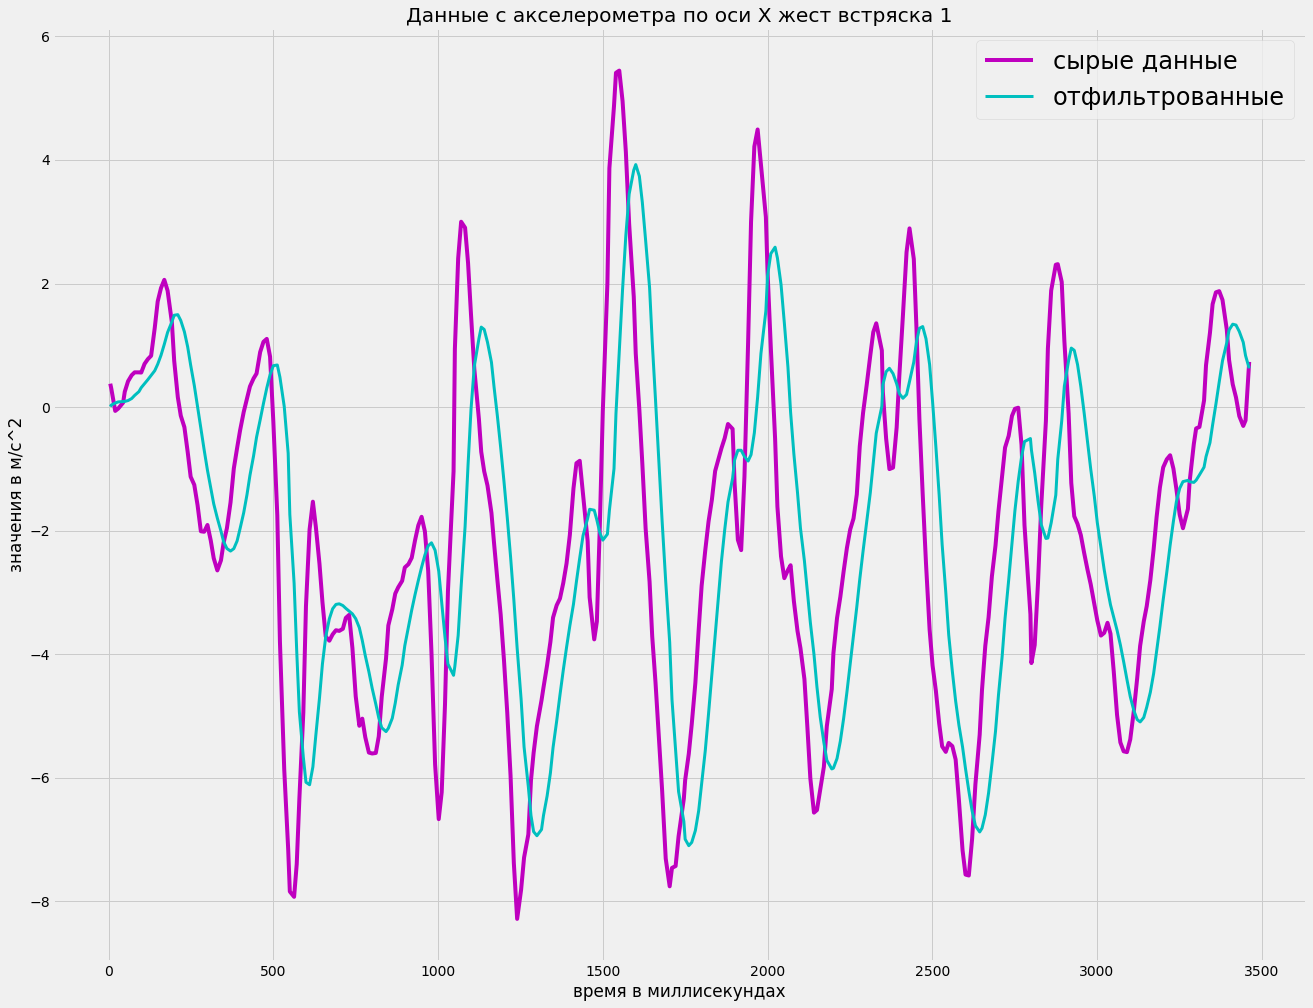

In [108]:
show_p('встряска', '1', 'm-', 'c-', 'X', 2
       , 1.5, 30, vectors_accelerometer_x, ox)

In [109]:
def make_plot(file, name_of_pic, number_of_pic, 
           order, cutoff_freq, sampling_freq):
    
    data = load_data("../data/" + file)
    ox, vectors_accelerometer_x, vectors_accelerometer_y, vectors_accelerometer_z = data_taking(data)
    show_p(name_of_pic, number_of_pic, 'm-', 'c-', 'X', 
           order, cutoff_freq, sampling_freq, vectors_accelerometer_x, ox)
    show_p(name_of_pic, number_of_pic, 'r-', 'g-', 'Y', 
           order, cutoff_freq, sampling_freq, vectors_accelerometer_y, ox)
    show_p(name_of_pic, number_of_pic, 'y-', 'b-', 'Z', 
           order, cutoff_freq, sampling_freq, vectors_accelerometer_z, ox)
    return 


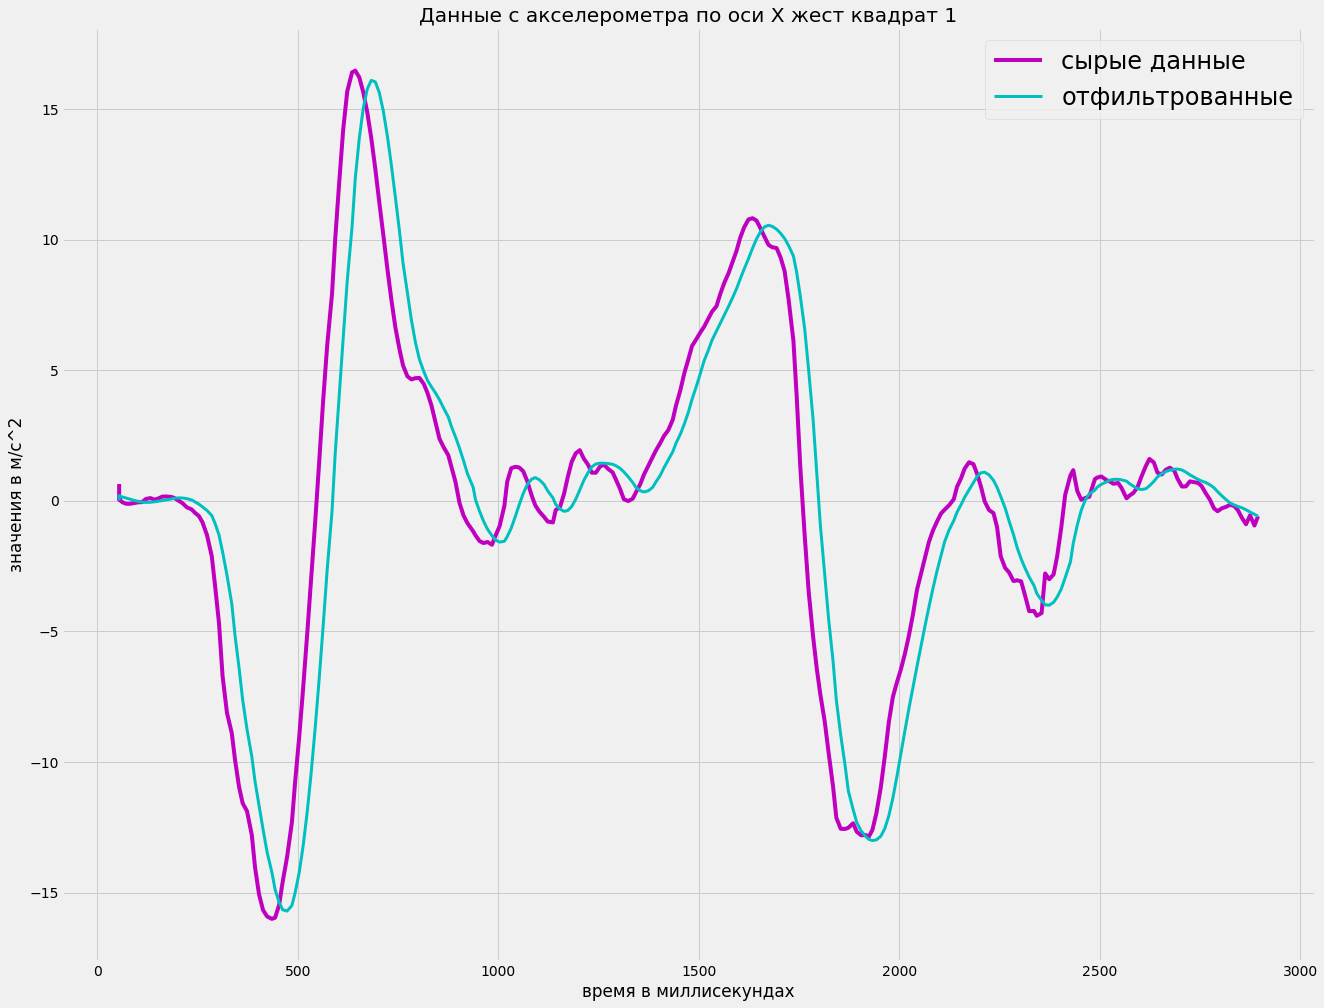

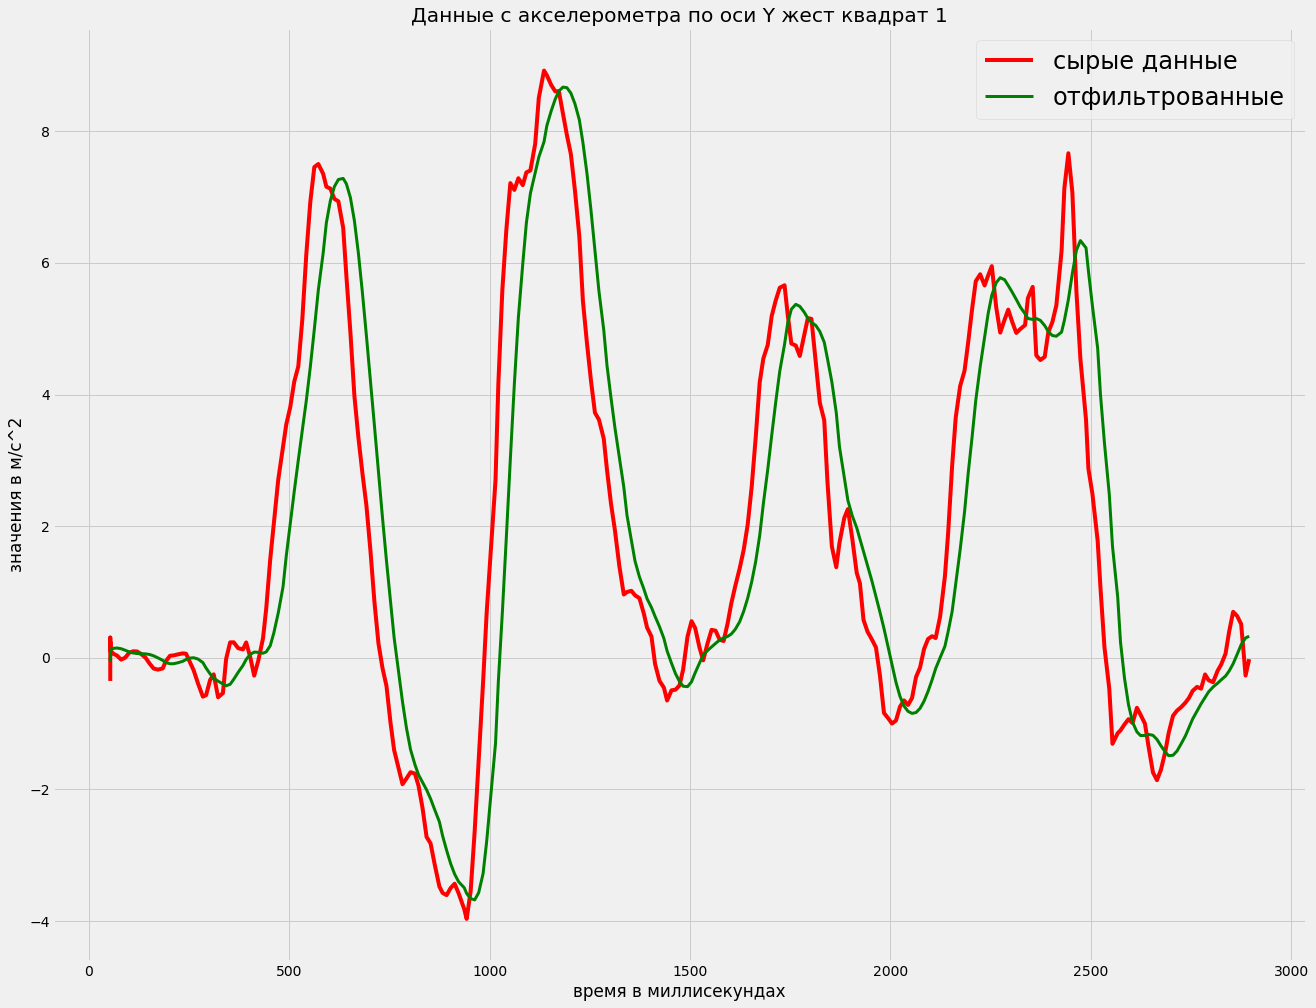

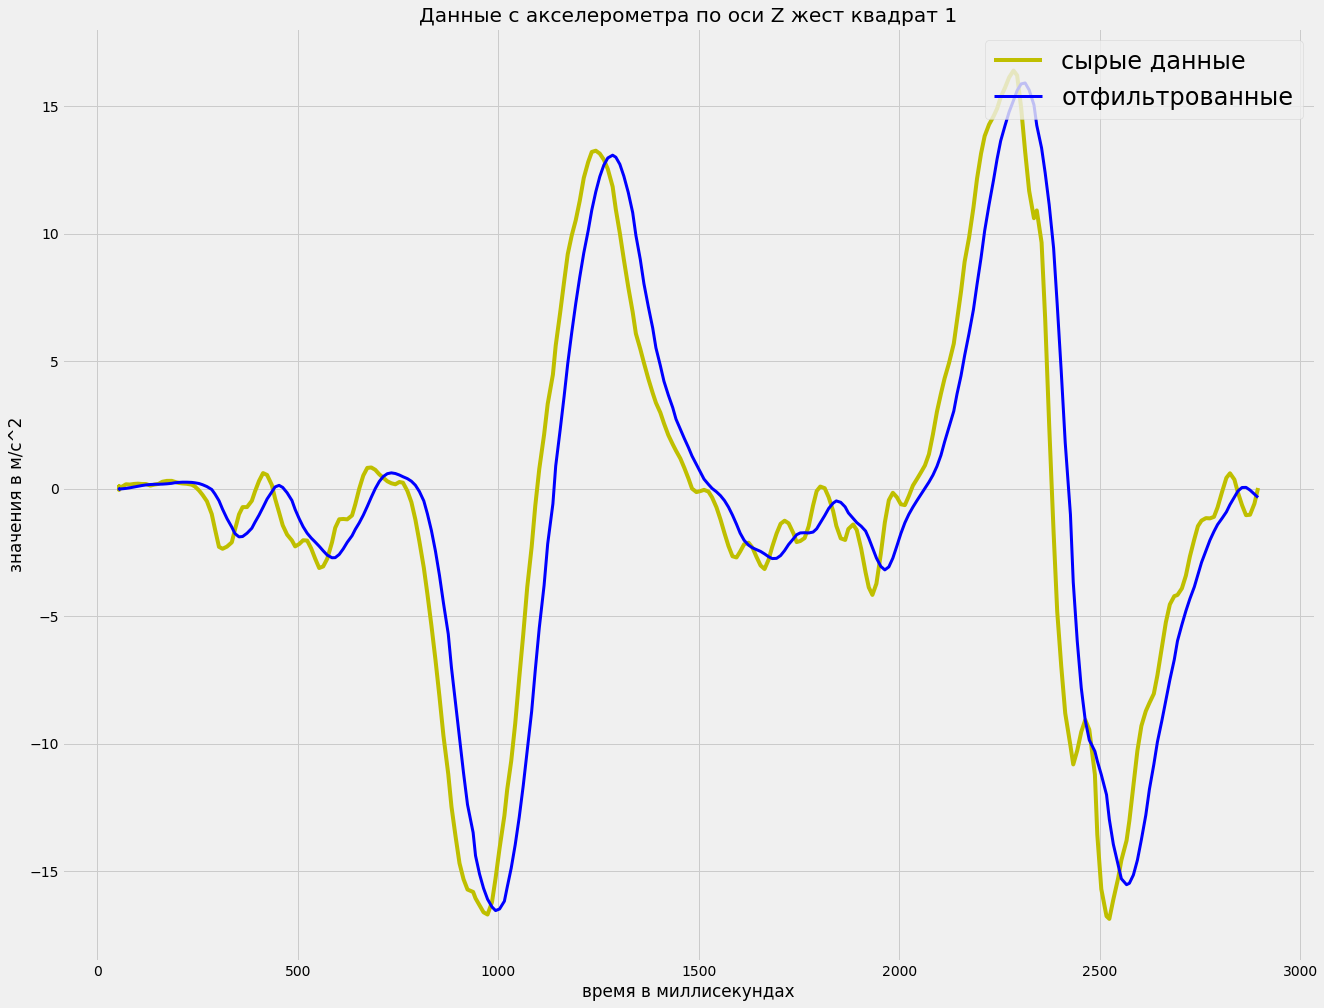

In [128]:
make_plot('квадрат.json', 'квадрат', '1', 2
       , 0.6, 10)

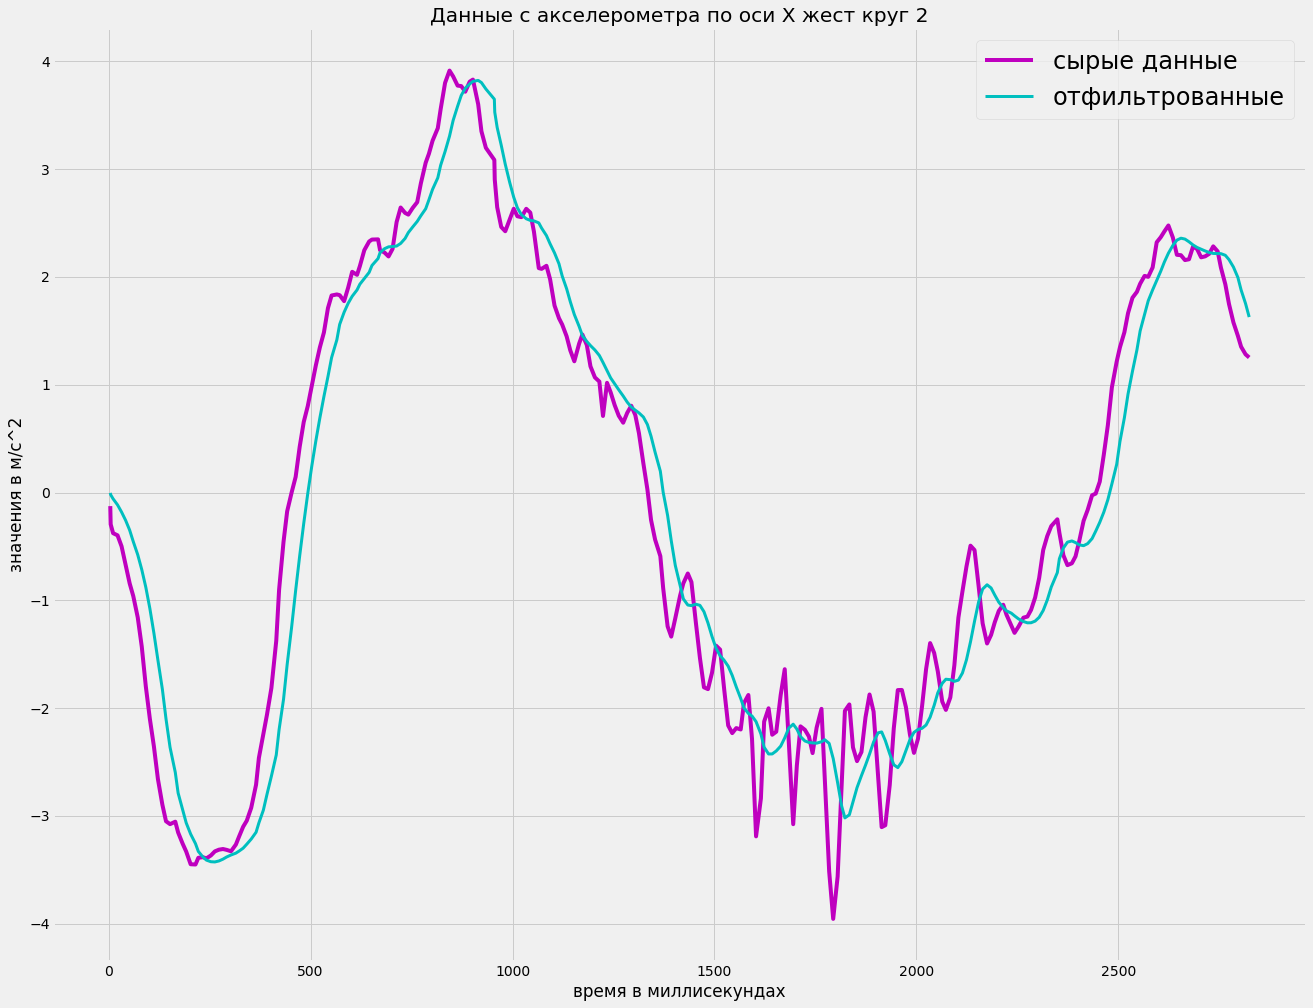

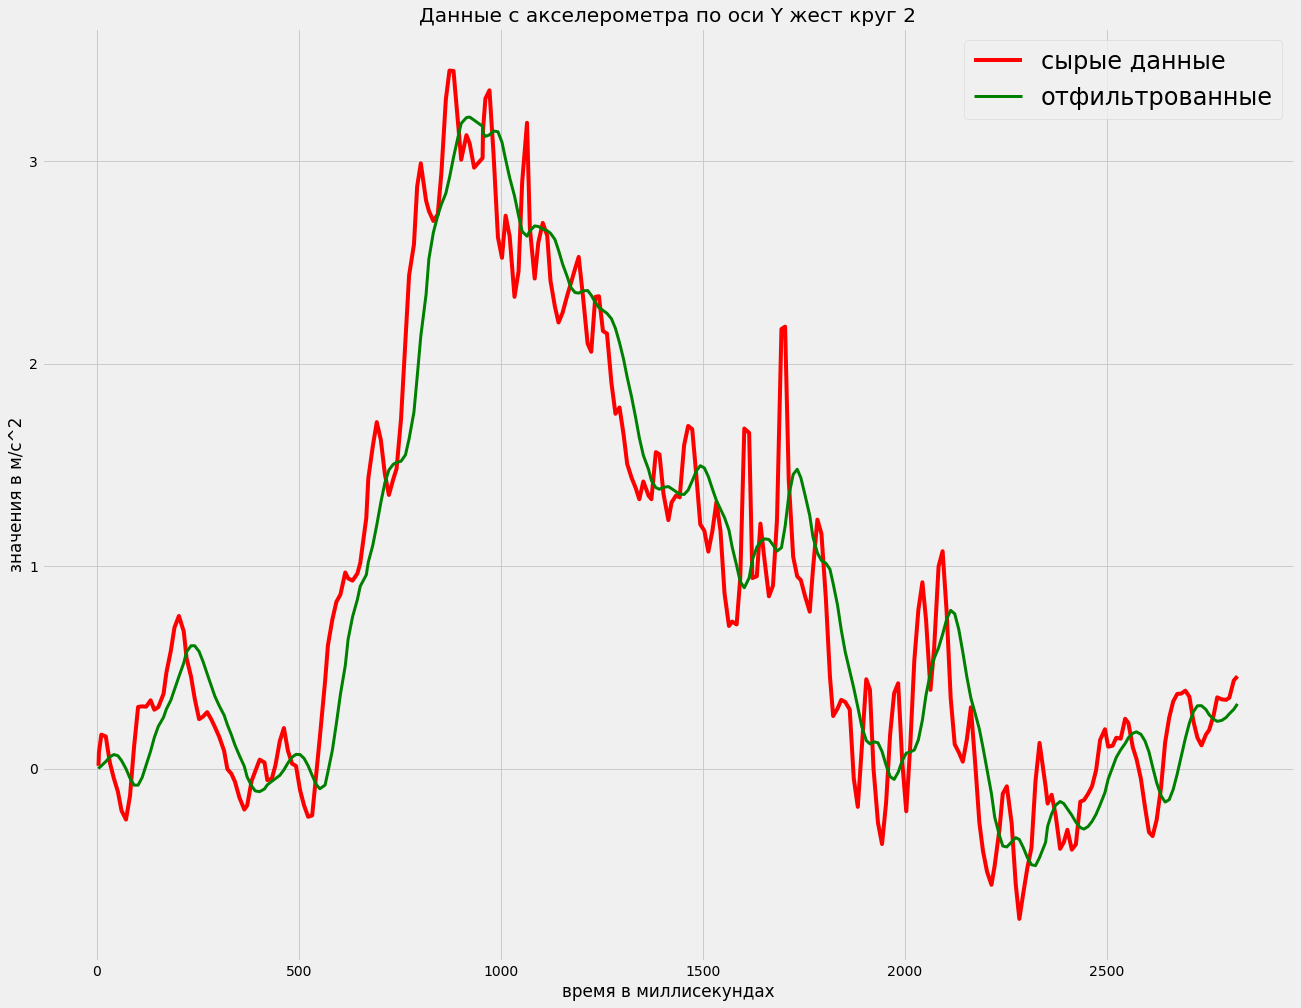

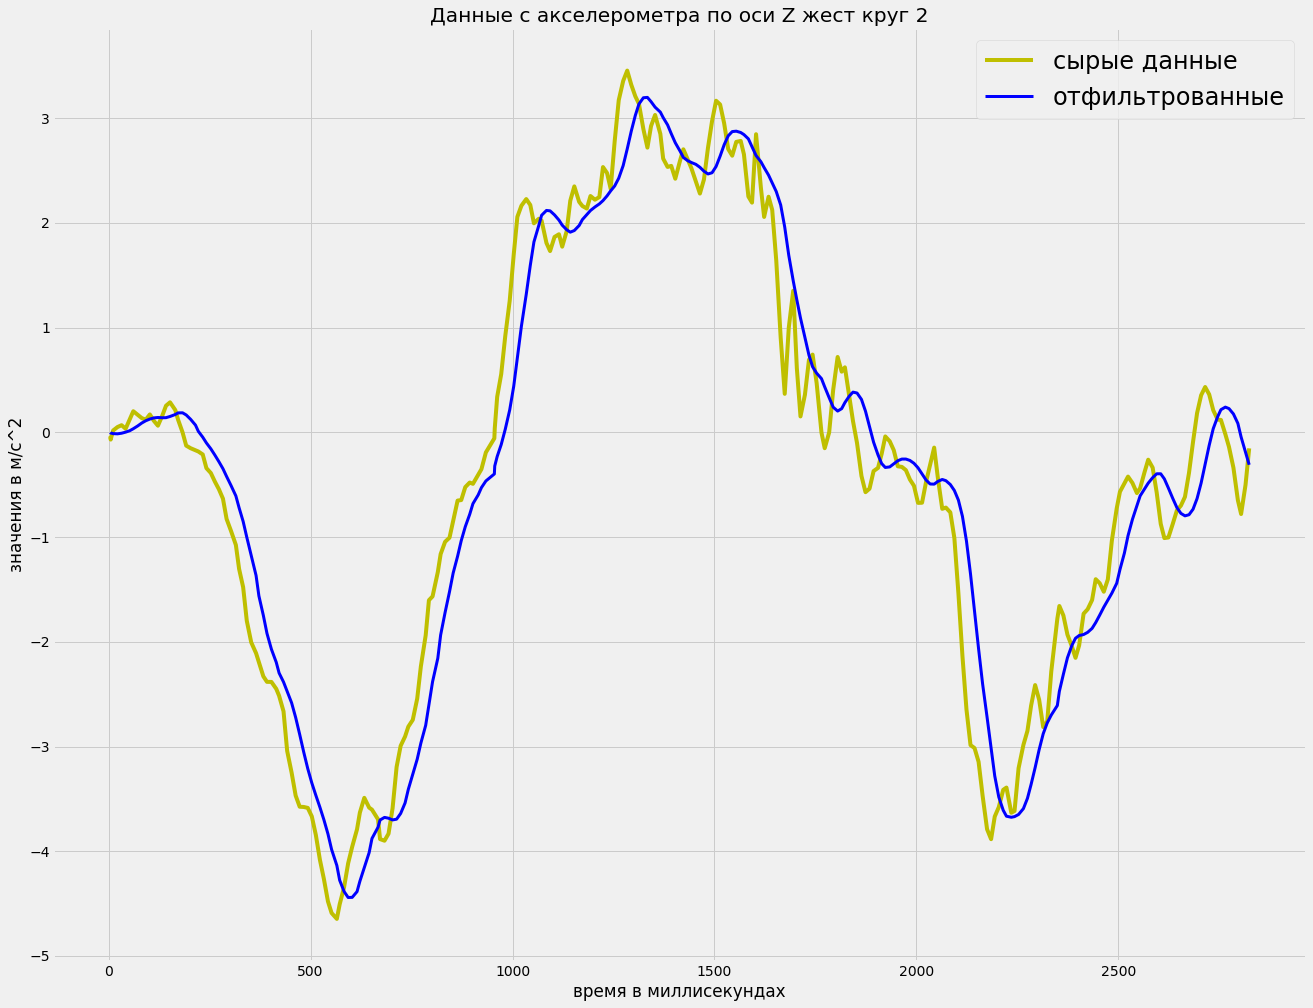

In [132]:
make_plot('круг 2.json', 'круг', '2', 2
       , 0.6, 10)

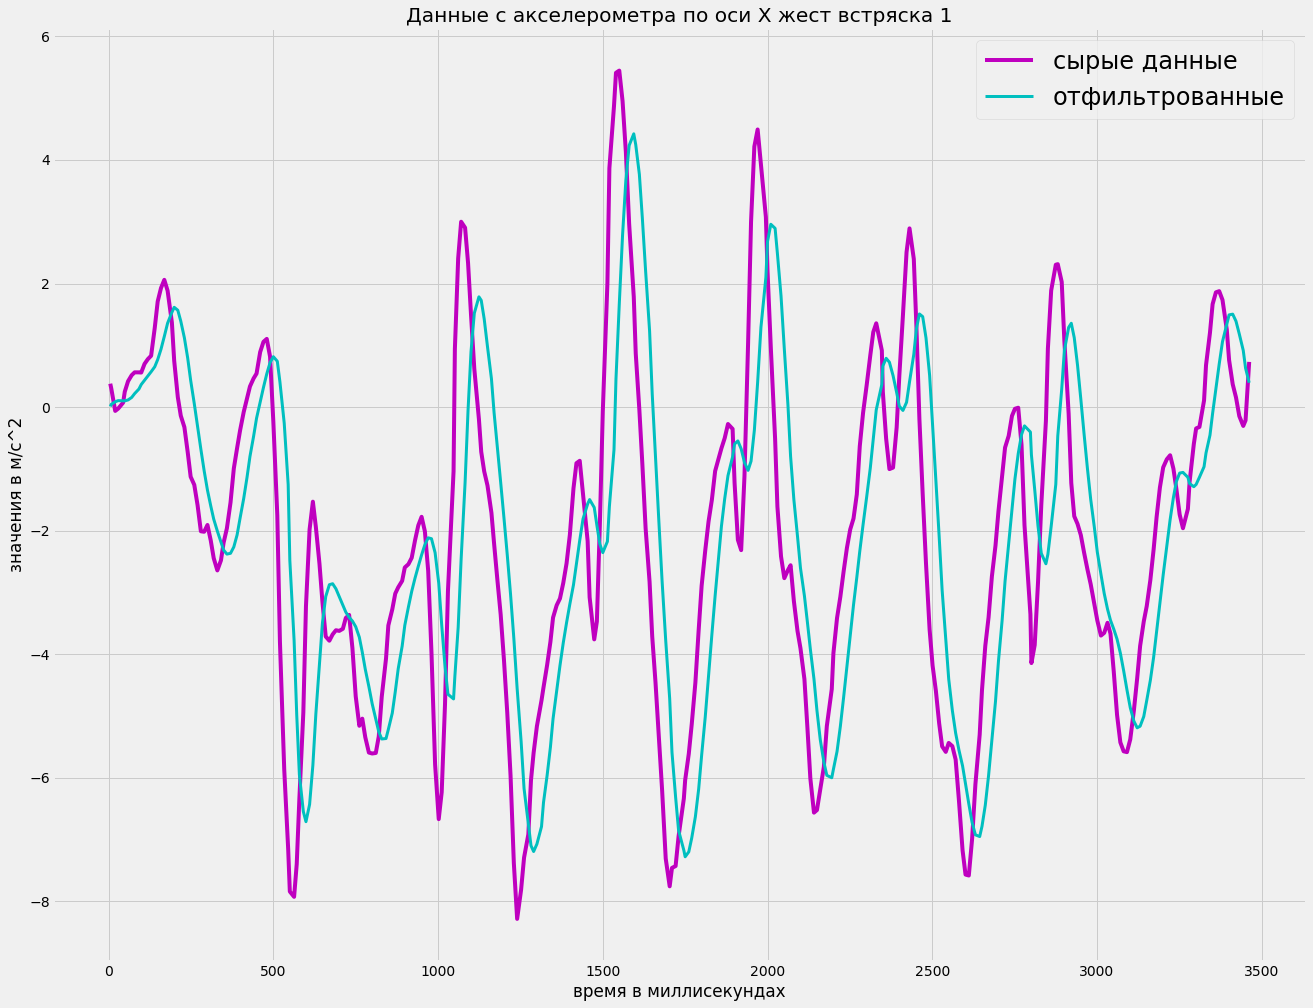

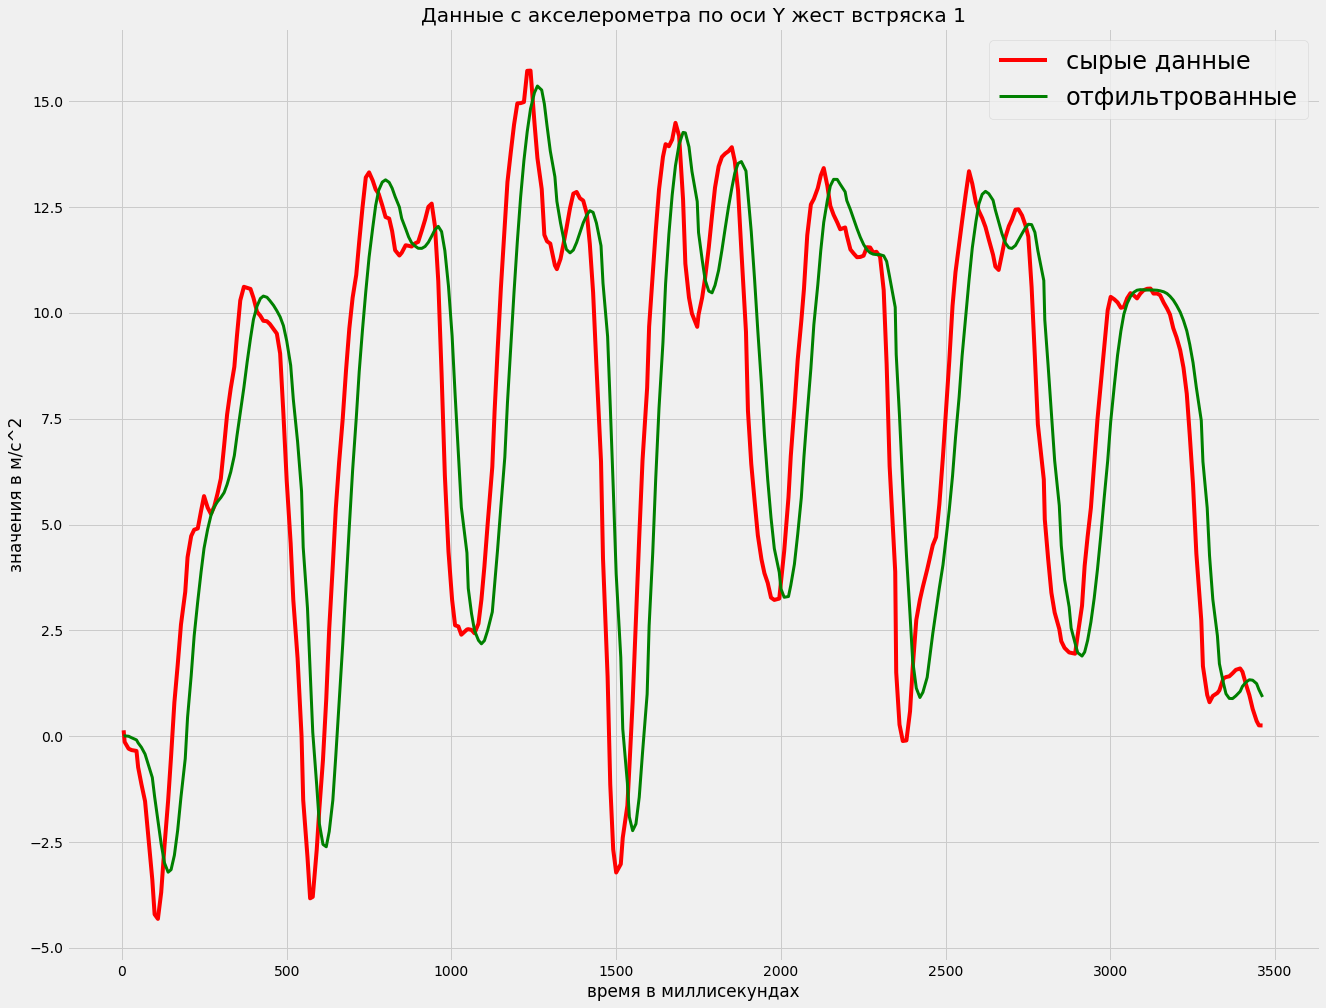

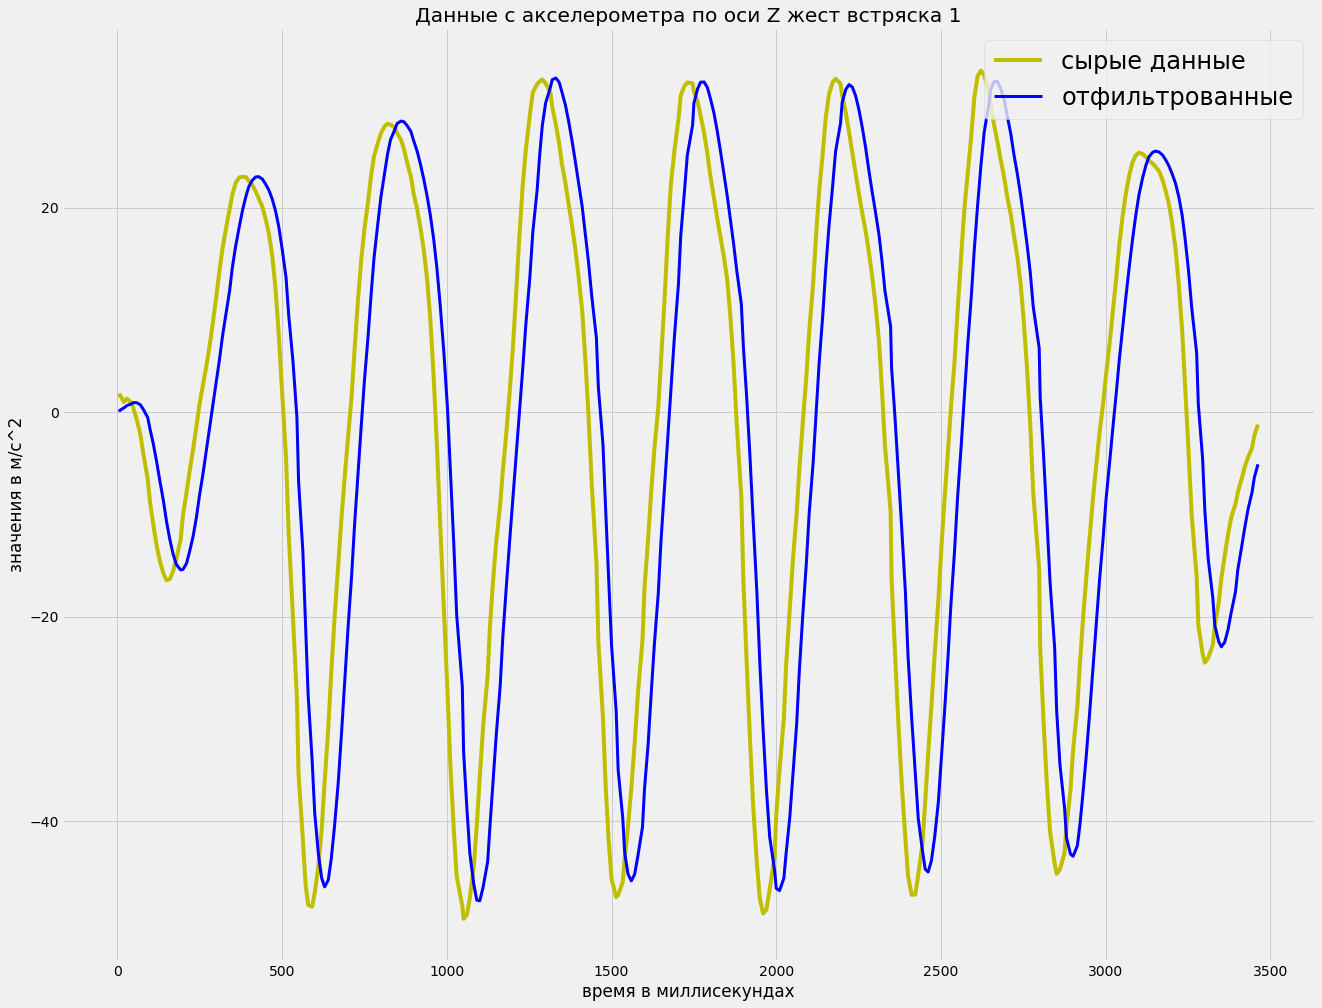

In [133]:
make_plot('встряска.json', 'встряска', '1', 2
       , 0.6, 10)

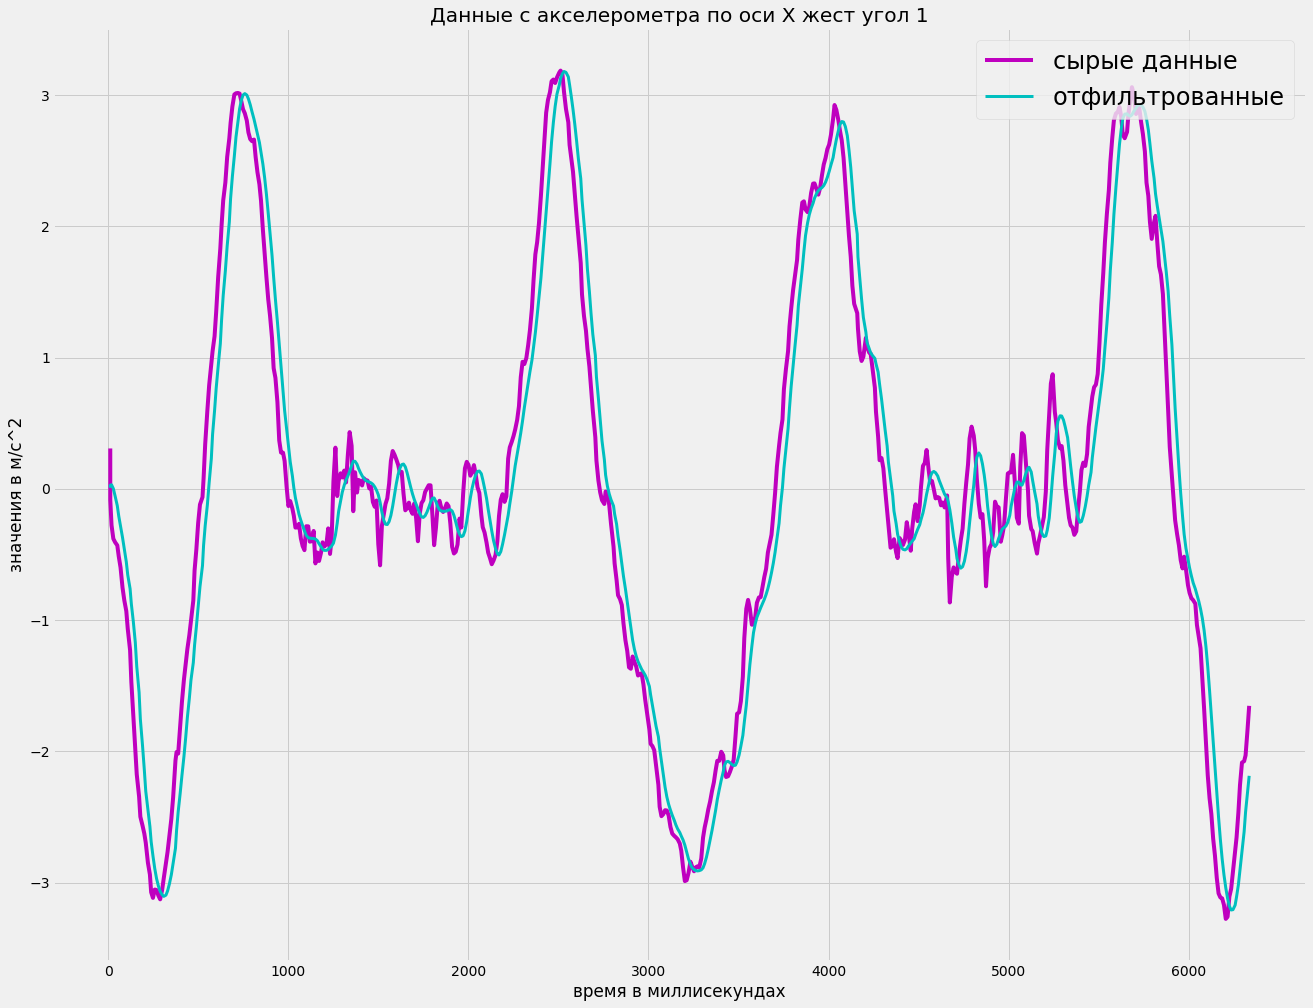

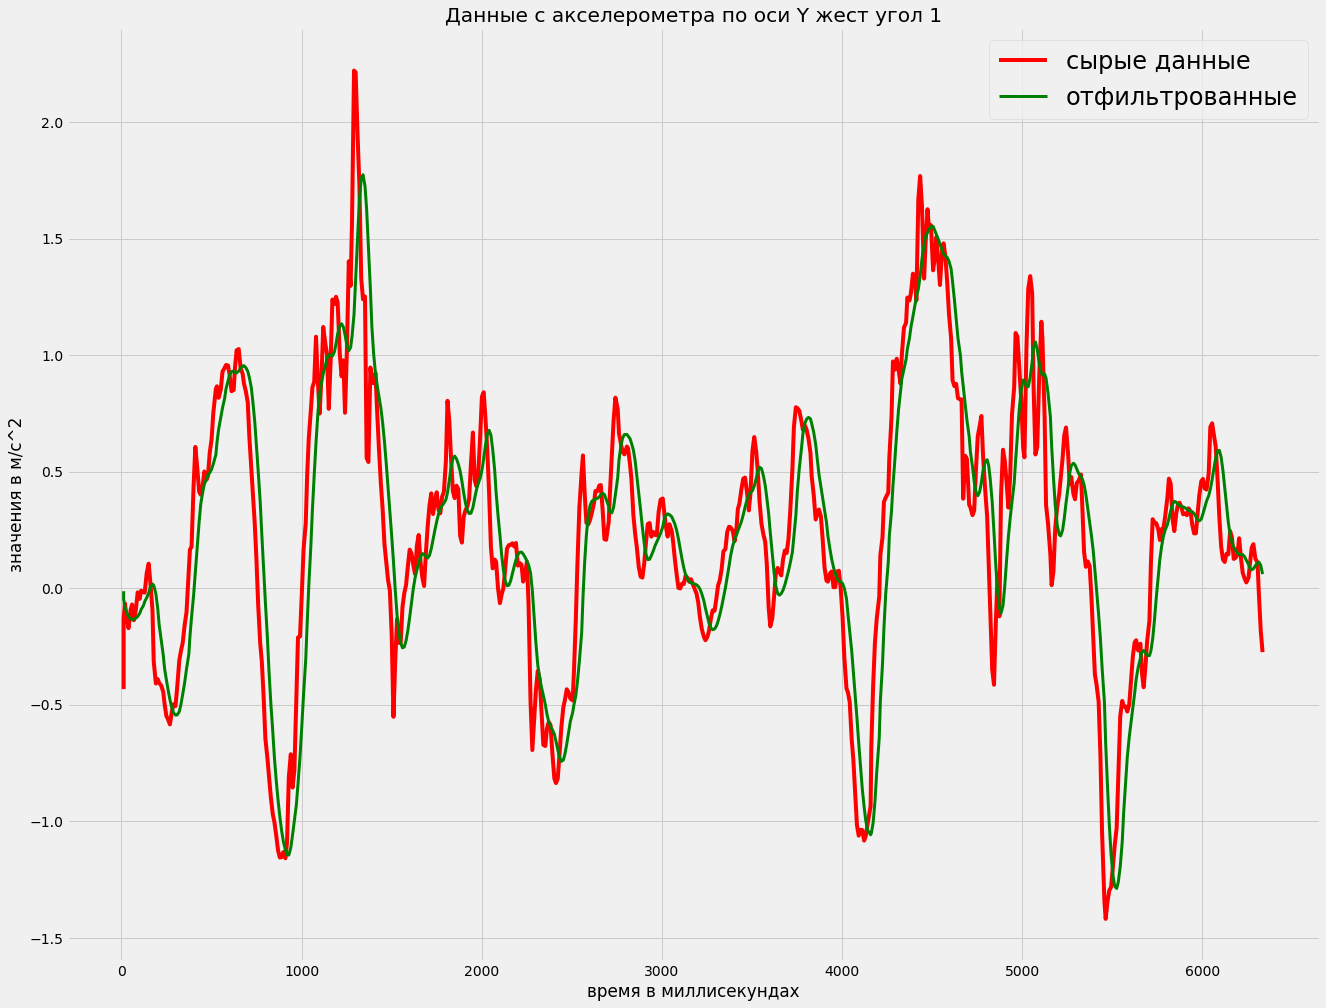

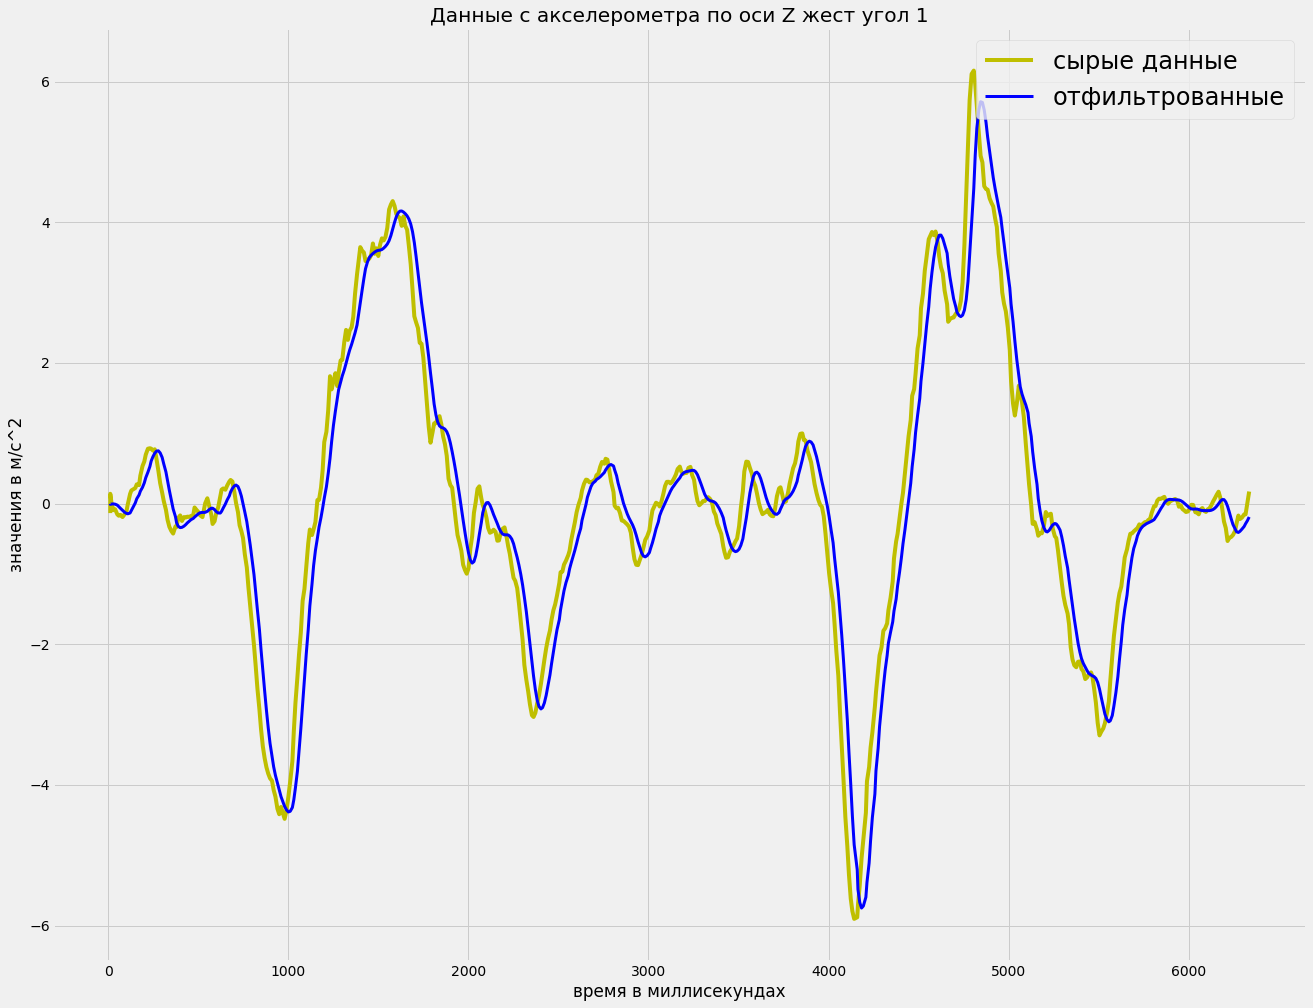

In [134]:
make_plot('угол.json', 'угол', '1', 2
       , 0.6, 10)